In [42]:
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy
import scipy.ndimage
colors = ["blue", "red", "black", "purple", "seagreen", "orange", "cyan", "olive"]

In [6]:
def rmse(signal1, signal2):
    return (((signal1-signal2)**2).mean())**0.5

In [7]:
plt.rcParams['font.family'] = 'Times New Roman'

In [8]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{mathptmx}'

# Visualize the learning curve

In [9]:
lcurve = np.loadtxt("lcurve.out")

In [12]:
!head -n 5 lcurve.out

#  step      rmse_val    rmse_trn    rmse_e_val  rmse_e_trn    rmse_f_val  rmse_f_trn         lr
      0      2.49e+01    2.42e+01      1.14e+00    1.15e+00      7.85e-01    7.62e-01    1.0e-03
    100      1.09e+01    1.16e+01      1.81e-01    2.26e-01      3.45e-01    3.65e-01    1.0e-03
    200      8.34e+00    8.19e+00      6.94e-02    5.86e-02      2.64e-01    2.59e-01    1.0e-03
    300      7.80e+00    7.38e+00      6.40e-02    1.18e-02      2.47e-01    2.33e-01    1.0e-03


## Training error of energy

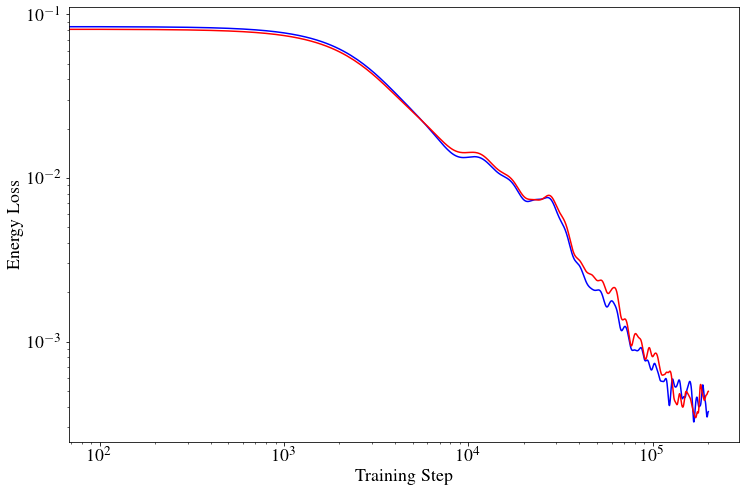

In [40]:
plt.figure(figsize=(12, 8))
plt.xlabel("Training Step", fontsize=18)
plt.ylabel("Energy Loss", fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.plot(lcurve[:, 0], scipy.ndimage.gaussian_filter(lcurve[:, 4], sigma=20), color=colors[0], label="training set")
plt.plot(lcurve[:, 0], scipy.ndimage.gaussian_filter(lcurve[:, 3], sigma=20), color=colors[1], label="validation set")

## Training error of force

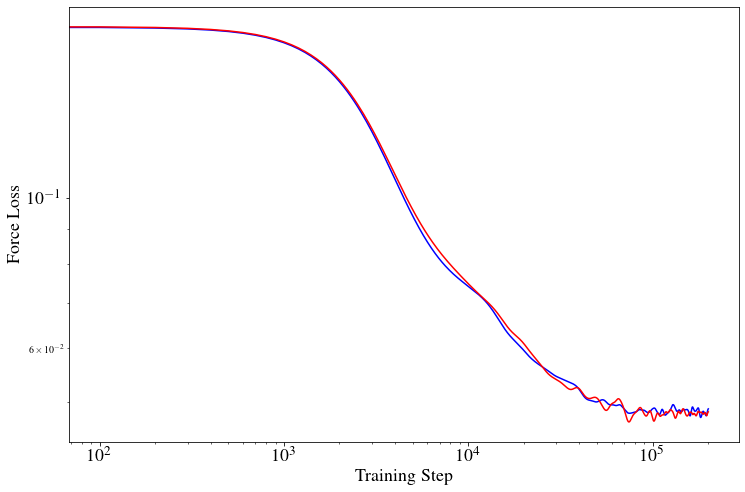

In [38]:
plt.figure(figsize=(12, 8))
plt.xlabel("Training Step", fontsize=18)
plt.ylabel("Force Loss", fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale("log")
plt.yscale("log")
plt.plot(lcurve[:, 0], scipy.ndimage.gaussian_filter(lcurve[:, 6], sigma=20), color=colors[0], label="training set")
plt.plot(lcurve[:, 0], scipy.ndimage.gaussian_filter(lcurve[:, 5], sigma=20), color=colors[1], label="validation set")


# Calculate the inference error

## Load labels

In [60]:
train_pattern = os.path.join("./data/train", '**', "energy.npy")
test_pattern = os.path.join("./data/test", '**', "energy.npy")
train_files = sorted([f for f in glob.glob(train_pattern, recursive=True)])
test_files = sorted([f for f in glob.glob(test_pattern, recursive=True)])

train_energies = []
train_forces = []
test_energies = []
test_forces = []

for energy_file in train_files:
    force_file = energy_file.replace("energy.npy", "force.npy")

    energy = np.load(energy_file)
    force = np.load(force_file)
    train_energies.append(energy)
    train_forces.append(force)

for energy_file in test_files:
    force_file = energy_file.replace("energy.npy", "force.npy")

    energy = np.load(energy_file)
    force = np.load(force_file)
    test_energies.append(energy)
    test_forces.append(force)

train_energies = np.concatenate(train_energies)
train_forces = np.concatenate(train_forces)
test_energies = np.concatenate(test_energies)
test_forces = np.concatenate(test_forces)

## Load inference results

In [61]:
train_infer_energies = np.load("infer_results/train_e.npy")
train_infer_forces = np.load("infer_results/train_f.npy")
test_infer_energies = np.load("infer_results/test_e.npy")
test_infer_forces = np.load("infer_results/test_f.npy")

## Calculate RMSE

In [62]:
rmse(train_energies.flatten(), train_infer_energies.flatten())

0.10757860800699465

In [63]:
rmse(train_forces.flatten(), train_infer_forces.flatten())

0.048372528583154904

In [64]:
rmse(test_energies.flatten(), test_infer_energies.flatten())

0.10538654107741965

In [65]:
rmse(test_forces.flatten(), test_infer_forces.flatten())

0.04834760855931679

In [ ]:
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.xlim(-10, 10)
# plt.ylim(-10, 10)

plt.xlabel("$E_{\mathrm{train}}$ / eV", fontsize=16)
plt.ylabel("$E_{\mathrm{train}}^{\mathrm{infer}}$ / eV", fontsize=16)

plt.plot([-29962, -29946], [-29962, -29946], color="red")

plt.scatter(train_energies.flatten(), train_infer_energies.flatten(), color=colors[0], label="training set")
plt.legend(fontsize=16)
plt.show()

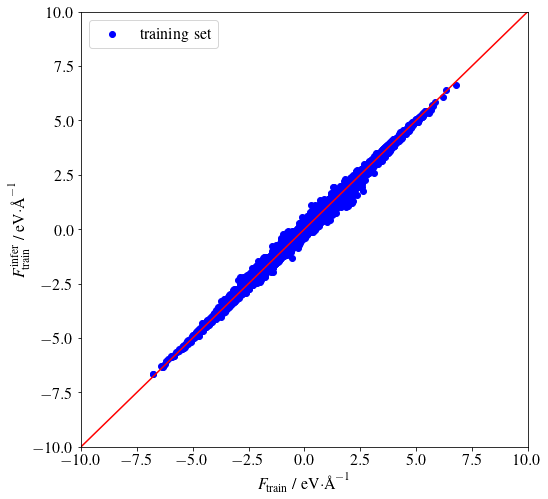

In [68]:
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel("$F_{\mathrm{train}}$ / eV$\cdot\mathrm{\AA}^{-1}$", fontsize=16)
plt.ylabel("$F_{\mathrm{train}}^{\mathrm{infer}}$ / eV$\cdot\mathrm{\AA}^{-1}$", fontsize=16)

plt.plot([-50, 50], [-50, 50], color="red")

plt.scatter(train_forces.flatten(), train_infer_forces.flatten(), color=colors[0], label="training set")
plt.legend(fontsize=16)
plt.show()

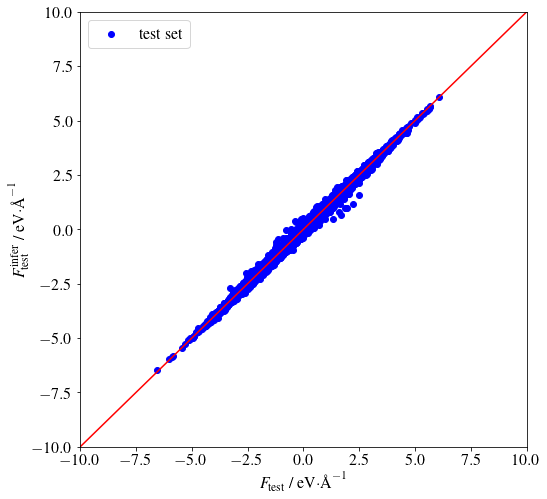

In [69]:
plt.figure(figsize=(8, 8))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel("$F_{\mathrm{test}}$ / eV$\cdot\mathrm{\AA}^{-1}$", fontsize=16)
plt.ylabel("$F_{\mathrm{test}}^{\mathrm{infer}}$ / eV$\cdot\mathrm{\AA}^{-1}$", fontsize=16)

plt.plot([-50, 50], [-50, 50], color="red")

plt.scatter(test_forces.flatten(), test_infer_forces.flatten(), color=colors[0], label="test set")
plt.legend(fontsize=16)
plt.show()